Improve AI for your start-up
-----------------

**In this project we will work with the yelp business and review dataset to detect the customer dissatisfaction. We we basically use unsupervised learning to do this. We will use the Word2Vec approach.**

In [1]:
import numpy as np 
import pandas as pd # 
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import date,datetime
#from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn import cluster, metrics
from yellowbrick.cluster import KElbowVisualizer
# To train word2vec
from gensim.models import Word2Vec
import textblob as tb
from textblob import TextBlob, Word
from gensim import models, matutils
from pprint import pprint
# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
from sklearn import manifold, decomposition
from collections import defaultdict
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [2]:
reviews = pd.read_json('yelpdata/yelp_academic_dataset_review.json', lines=True, chunksize = 20000)
for review in reviews:
    print(review)
    break

                    review_id                 user_id             business_id  \
0      lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1      8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2      NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3      T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4      sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   
...                       ...                     ...                     ...   
19995  XC0iZgKMK0_zRk9vDKUhNg  nZINe2ni7oR-AxyB7XzVwA  uJFnuF_nYebV_bfNsoGPrQ   
19996  ZiYsh-I7Ebsu-6-yHJ52Lw  tyN5FVSYgYTh_JAVKyTZag  vUvMI4xCOOvUK8XkbZNNVw   
19997  Zwhvxg8meUBOP54ZZ5Dnuw  KBF8F9gANiBZZLNaCEy2fQ  F5_NonP-uoq4v3qplmjiLA   
19998  aziqkO_0sm2QdB8Yyh44pw  fUhotHRxeDI13_v1v7yllA  EBIxeySmja_aCq698sVggQ   
19999  _yNqY-oo8hQDUG_gNee3bA  C9aI3K7zCq4egw6d_bx0pQ  7_gpvwLDk2M0Ztvw6z28vA   

       stars  useful  funny

In [3]:
review.head()

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   

   stars  useful  funny  cool  \
0      4       3      1     1   
1      4       1      0     0   
2      5       0      0     0   
3      2       1      1     1   
4      4       0      0     0   

                                                text                date  
0  Apparently Prides Osteria had a rough summer a... 2014-10-11 03:34:02  
1  This store is pretty good. Not as great as Wal... 2015-07-03 20:38:25  
2  I called WVM on the recommendation of a couple... 2013-05-28 20:38:06  
3  I've stayed at many Marriott and Renaissance M... 2010-01-08 02:29:15  
4  The food is always great here. The service fro... 2011-07-28 18:05:01

In [4]:
#review["date"]=  pd.to_datetime(review["date"], format='%Y-%m-%d')


review['date'] = pd.to_datetime(review['date']).dt.date

In [5]:
review.head()

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   

   stars  useful  funny  cool  \
0      4       3      1     1   
1      4       1      0     0   
2      5       0      0     0   
3      2       1      1     1   
4      4       0      0     0   

                                                text        date  
0  Apparently Prides Osteria had a rough summer a...  2014-10-11  
1  This store is pretty good. Not as great as Wal...  2015-07-03  
2  I called WVM on the recommendation of a couple...  2013-05-28  
3  I've stayed at many Marriott and Renaissance M...  2010-01-08  
4  The food is always great here. The service fro...  2011-07-28

In [6]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [7]:
businesss = pd.read_json('yelpdata/yelp_academic_dataset_business.json', lines=True, chunksize = 20000)
for business in businesss:
    print(business)
    break

                  business_id                        name  \
0      6iYb2HFDywm3zjuRg0shjw         Oskar Blues Taproom   
1      tCbdrRPZA0oiIYSmHG3J0w     Flying Elephants at PDX   
2      bvN78flM8NLprQ1a1y5dRg              The Reclaimory   
3      oaepsyvc0J17qwi8cfrOWg                 Great Clips   
4      PE9uqAjdw0E4-8mjGl3wVA           Crossfit Terminus   
...                       ...                         ...   
19995  Q4BSpLqBsR1v-d2KfzNqHg           Boston Bark Mulch   
19996  xeryhbJ44aJIWY0kqTKItg  Orchards Express Auto Care   
19997  0TOWPTTqW3aL_Dgh2WwYKw                 Scioto Park   
19998  2hC_n_CezRLjd7T3G82KIA     Bedrosians Tile & Stone   
19999  v_vhixDAOD50PkU0_rKHzQ             J&L Hair Studio   

                           address         city state postal_code   latitude  \
0                     921 Pearl St      Boulder    CO       80302  40.017544   
1              7000 NE Airport Way     Portland    OR       97218  45.588906   
2               4720 Hawtho

In [8]:
business.head()

business_id                     name              address  \
0  6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom         921 Pearl St   
1  tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX  7000 NE Airport Way   
2  bvN78flM8NLprQ1a1y5dRg           The Reclaimory   4720 Hawthorne Ave   
3  oaepsyvc0J17qwi8cfrOWg              Great Clips   2566 Enterprise Rd   
4  PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus  1046 Memorial Dr SE   

          city state postal_code   latitude   longitude  stars  review_count  \
0      Boulder    CO       80302  40.017544 -105.283348    4.0            86   
1     Portland    OR       97218  45.588906 -122.593331    4.0           126   
2     Portland    OR       97214  45.511907 -122.613693    4.5            13   
3  Orange City    FL       32763  28.914482  -81.295979    3.0             8   
4      Atlanta    GA       30316  33.747027  -84.353424    4.0            14   

   is_open                                         attributes  \
0        1  {'RestaurantsTableService': 'True', 'WiFi': 'u...   
1        1  {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
2        1  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
3        1  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
4        1  {'GoodForKids': 'False', 'BusinessParking': '{...   

                                          categories  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...   
2  Antiques, Fashion, Used, Vintage & Consignment...   
3                         Beauty & Spas, Hair Salons   
4  Gyms, Active Life, Interval Training Gyms, Fit...   

                                               hours  
0  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...  
1  {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...  
2  {'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...  
3                                               None  
4  {'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...

In [9]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [10]:
business = business[['business_id', 'name', 'is_open', 'categories']]
business.head()

business_id                     name  is_open  \
0  6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom        1   
1  tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX        1   
2  bvN78flM8NLprQ1a1y5dRg           The Reclaimory        1   
3  oaepsyvc0J17qwi8cfrOWg              Great Clips        1   
4  PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus        1   

                                          categories  
0  Gastropubs, Food, Beer Gardens, Restaurants, B...  
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...  
2  Antiques, Fashion, Used, Vintage & Consignment...  
3                         Beauty & Spas, Hair Salons  
4  Gyms, Active Life, Interval Training Gyms, Fit...

## Let us merge the business and review datasets

In [11]:
review_bus = pd.merge(review, business, how = 'left', left_on = 'business_id', right_on = 'business_id')
review_bus.head()

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   

   stars  useful  funny  cool  \
0      4       3      1     1   
1      4       1      0     0   
2      5       0      0     0   
3      2       1      1     1   
4      4       0      0     0   

                                                text        date  \
0  Apparently Prides Osteria had a rough summer a...  2014-10-11   
1  This store is pretty good. Not as great as Wal...  2015-07-03   
2  I called WVM on the recommendation of a couple...  2013-05-28   
3  I've stayed at many Marriott and Renaissance M...  2010-01-08   
4  The food is always great here. The service fro...  2011-07-28   

                              name  is_open  \
0                   Prides Osteria        0   
1                           Target        1   
2         Willamette Valley Moving        1   
3  Renaissance Orlando at SeaWorld        1   
4                Brasserie Ten Ten        0   

                                          categories  
0  Restaurants, Wine Bars, Nightlife, Farmers Mar...  
1  Department Stores, Optometrists, Home & Garden...  
2            Home Services, Packing Services, Movers  
3  Hotels, Hotels & Travel, Restaurants, Event Pl...  
4                                Restaurants, French

In [12]:
review_bus.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
name           0
is_open        0
categories     1
dtype: int64

In [13]:
review_bus=review_bus.dropna()

In [14]:
review_bus=review_bus[review_bus['categories'].str.contains('Restaurants')]

In [15]:
review_bus['business_id'].value_counts()

bZiIIUcpgxh8mpKMDhdqbA    150
H_RM2u1WWGU1HkKZrYq2Ow    109
oz882XuZCxajKo64Opgq_Q     84
VPqWLp9kMiZEbctCebIZUA     71
jREzLrIEkc4jQKLfYMJ0gg     67
                         ... 
NYeVpGP_w3Eh2sPovDXO6A      1
Z7aBFdCfB5NhCarXZegHRw      1
xfJvSrIMFN8kLXVuKNPWKg      1
boxxtYkfzxYOzYto-wqNeA      1
VrOzEdPg53-iv_ce9642hw      1
Name: business_id, Length: 2943, dtype: int64

In [16]:
review_bus.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'is_open', 'categories'],
      dtype='object')

In [17]:
review_bus.head()

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   
5  J4a2TuhDasjn2k3wWtHZnQ  RNm_RWkcd02Li2mKPRe7Eg  xGXzsc-hzam-VArK6eTvtw   
6  28gGfkLs3igtjVy61lh77Q  Q8c91v7luItVB0cMFF_mRA  EXOsmAB1s71WePlQk0WZrA   

   stars  useful  funny  cool  \
0      4       3      1     1   
3      2       1      1     1   
4      4       0      0     0   
5      1       2      0     0   
6      2       0      0     0   

                                                text        date  \
0  Apparently Prides Osteria had a rough summer a...  2014-10-11   
3  I've stayed at many Marriott and Renaissance M...  2010-01-08   
4  The food is always great here. The service fro...  2011-07-28   
5  This place used to be a cool, chill place. Now...  2018-01-21   
6  The setting is perfectly adequate, and the foo...  2006-04-16   

                              name  is_open  \
0                   Prides Osteria        0   
3  Renaissance Orlando at SeaWorld        1   
4                Brasserie Ten Ten        0   
5                       The Burren        1   
6   Linwood Grill & BBQ Restaurant        0   

                                          categories  
0  Restaurants, Wine Bars, Nightlife, Farmers Mar...  
3  Hotels, Hotels & Travel, Restaurants, Event Pl...  
4                                Restaurants, French  
5  Restaurants, Bars, Irish Pub, Food, Pubs, Amer...  
6                                        Restaurants

In [18]:
review_bus.shape

(13946, 12)

In [19]:
review_bus.duplicated().sum()

0

In [20]:
review_bus.to_csv('restau.csv', index=False)

#### Exploratory Analysis

Top 10 reviewed restau in Yelp

In [21]:
top_restaurants = review_bus.name.value_counts().index[:10].tolist()
top_restaurants

['Hopdoddy Burger Bar',
 'Blue Star Donuts',
 'Barking Crab',
 'Medina Cafe',
 'South Congress Cafe',
 "Gus's World Famous Fried Chicken",
 "Santarpio's Pizza",
 'FLIP burger boutique',
 'Myers & Chang',
 'Saus']

In [22]:
review_top = review_bus.loc[review_bus['name'].isin(top_restaurants)]
review_top.shape

(748, 12)

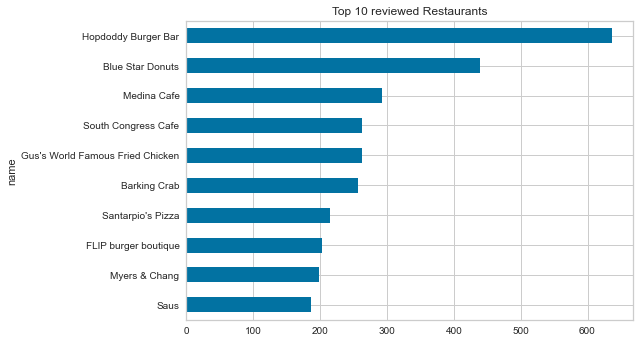

In [23]:
review_top.groupby(review_top.name)['stars'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 reviewed Restaurants');

In [24]:
review_top_useful=review_top.groupby(review_top.name)[['useful','funny', 'cool']].sum().sort_values('useful',
                                                                                             ascending=True)

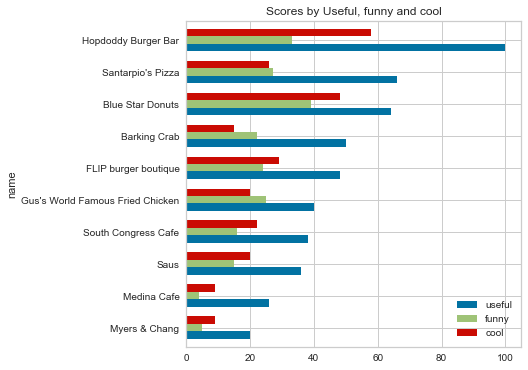

In [25]:
review_top_useful.plot(kind='barh', figsize=(6, 6),width=0.7)
plt.title('Scores by Useful, funny and cool');

In [26]:
available_review = review_bus.query("useful > 0 and cool > 0 and funny > 0")
print("Number of available reviews: ", len(available_review))

Number of available reviews:  1276


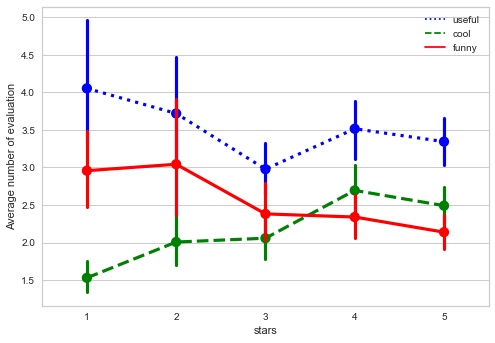

In [27]:
import matplotlib.lines as mlines
sns.pointplot(x = 'stars', y = 'useful', data = available_review, color="blue", linestyles='dotted')
sns.pointplot(x = 'stars', y = 'cool', data = available_review, color="green", linestyles='--')
sns.pointplot(x = 'stars', y = 'funny', data = available_review, color="red")
lg1 = mlines.Line2D([], [], color='blue', label='useful', linestyle='dotted')
lg2 = mlines.Line2D([], [], color='green', label='cool', linestyle='--')
lg3 = mlines.Line2D([], [], color='red', label='funny')
plt.ylabel('Average number of evaluation')
plt.legend(handles=[lg1, lg2, lg3]);

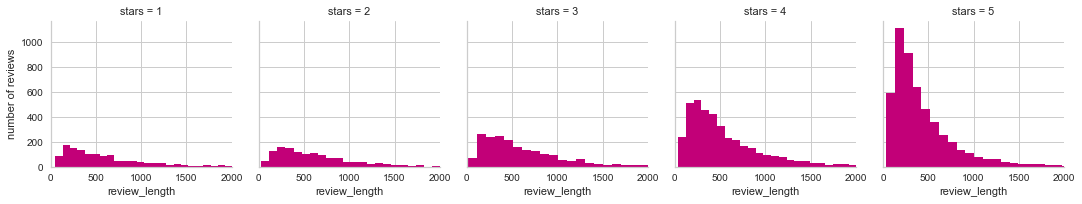

In [28]:
review_bus['review_length'] = review_bus.text.map(len)
ax = sns.FacetGrid(data=review_bus, col='stars', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50, color='xkcd:magenta')
ax.axes[0][0].set(ylabel='number of reviews');

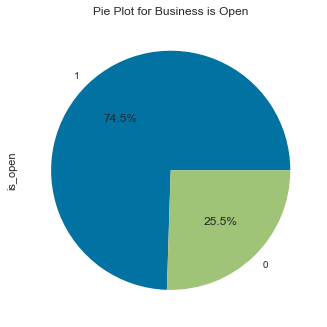

In [29]:
review_bus['is_open'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for Business is Open');

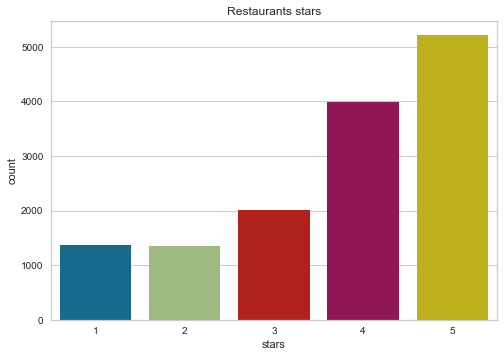

In [30]:
sns.countplot(x='stars', data=review_bus).set_title('Restaurants stars');

In [31]:
review_bus['word_count'] = review_bus['text'].apply(lambda x: len(str(x).split(" ")))
review_bus[['text','word_count', 'stars']].head()

text  word_count  stars
0  Apparently Prides Osteria had a rough summer a...         322      4
3  I've stayed at many Marriott and Renaissance M...          71      2
4  The food is always great here. The service fro...          36      4
5  This place used to be a cool, chill place. Now...          57      1
6  The setting is perfectly adequate, and the foo...          35      2

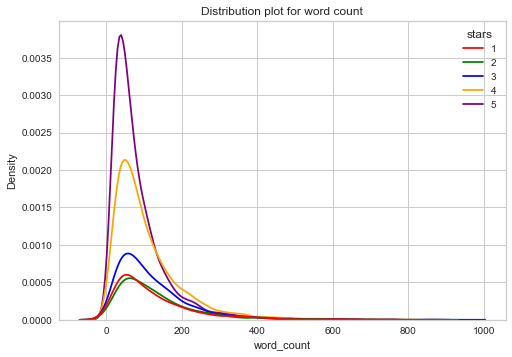

In [32]:
sns.kdeplot(x=review_bus['word_count'], hue=review_bus['stars'], 
            palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for word count');

In [33]:
stopword = stopwords.words('english')

review_bus['stopwords'] = review_bus['text'].apply(lambda x: len([x for x in x.split() if x in stopword]))
review_bus[['text','stopwords', 'stars']].head()

text  stopwords  stars
0  Apparently Prides Osteria had a rough summer a...        133      4
3  I've stayed at many Marriott and Renaissance M...         36      2
4  The food is always great here. The service fro...         14      4
5  This place used to be a cool, chill place. Now...         27      1
6  The setting is perfectly adequate, and the foo...         11      2

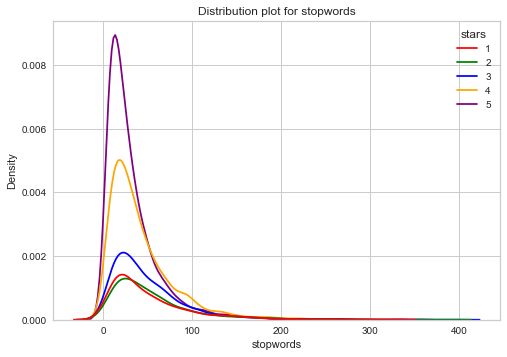

In [34]:
# distribution of the stopword in each review text
sns.kdeplot(x=review_bus['stopwords'], hue=review_bus['stars'], 
            palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for stopwords');

In [35]:
review_bus['char_count'] = review_bus['text'].str.len()
review_bus[['text','char_count', 'stars']].head()

text  char_count  stars
0  Apparently Prides Osteria had a rough summer a...        1856      4
3  I've stayed at many Marriott and Renaissance M...         390      2
4  The food is always great here. The service fro...         181      4
5  This place used to be a cool, chill place. Now...         301      1
6  The setting is perfectly adequate, and the foo...         213      2

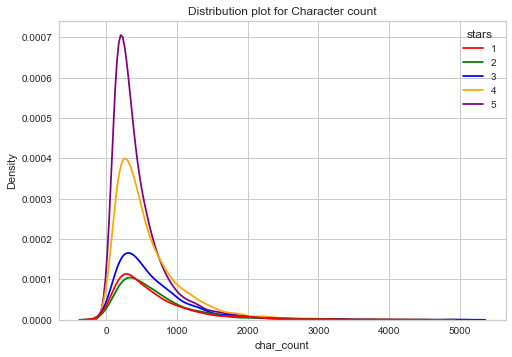

In [36]:
sns.kdeplot(x=review_bus['char_count'], hue=review_bus['stars'], palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for Character count');

### Preprocessing the text

In [37]:
def prep(word):
    return word.replace("_", " ")

In [38]:
# remove underscore from text
review_bus['text'] = review_bus['text'].apply(prep)

In [39]:
def preprocess(x):
    x = re.sub('[^a-z\s_]', '', x.lower()) # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally we combine all of these
stopwords = set(i).union(j)
review_bus['clean_text'] = review_bus['text'].apply(preprocess)

## Process of stemming

In [40]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

review_bus['clean_text'] = review_bus['clean_text'].apply(lambda text: stem_words(text))

### Process of Lemmatisation

In [41]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
def lem_words(text):
    return " ".join([lemma.lemmatize(word) for word in text.split()])

review_bus['clean_text'] = review_bus['clean_text'].apply(lambda text: lem_words(text))

### Get rid of adverbs

In [42]:
#import spacy

In [43]:
#nlp = spacy.load('en_core_web_sm') 
#excluded_tags = {"ADV"}

#sentences = review_bus['clean_text']
#new_sentences = []
#for sentence in sentences:
#    new_sentence = []
#    for token in nlp(sentence):
#        if token.pos_ not in excluded_tags:
#            new_sentence.append(token.text)
#   new_sentences.append(" ".join(new_sentence))

In [44]:
#new_sentences

In [45]:
#rev_df=pd.DataFrame(new_sentences, columns =['clean'])

In [46]:
#rev_df.head()

In [47]:
rev_df = pd.DataFrame({'clean': review_bus['clean_text']})

In [48]:
rev_df=rev_df.reset_index(drop=True)
rev_df.head()

clean
0  appar pride osteria rough summer evidenc almos...
1  ive stay mani marriott renaiss marriott huge d...
2  food alway great servic manag well staff super...
3  place use cool chill place bunch neanderth bou...
4  set perfectli adequ food come close dine chain...

In [49]:
#rev_df.to_csv('rev.csv', index=False)

In [50]:
#import pyLDAvis
#import pyLDAvis.gensim_models

In [51]:
# Visualizing the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
#vis

### Now we try to solve the same problem using word2vec method.

In [52]:
rev_df.shape

(13946, 1)

In [53]:
#rev_df[rev_df['clean'].str.contains("_")]

In [54]:
# As Phrases() takes list of list as it's input
# Converting dataframe to list of list
sent = [row for row in rev_df['clean']]

# Tokenization of each sentance
token_sent = [doc.split(" ") for doc in sent]

# Configuring Phrases() for bigram
bigram = Phrases(token_sent, min_count=35, threshold=2)

# Intializing Phrases() for bigram
bigram_phraser = Phraser(bigram)

# Extract bigrams for gensim word2vec
bigram_token = []
for sen in token_sent:
    bigram_token.append(bigram_phraser[sen])

In [55]:
# Count most frequent words
word_freq = defaultdict(int)
for sen in bigram_token:
    for i in sen:
        word_freq[i] += 1
len(word_freq)

# print most frequent words
sorted(word_freq, key=word_freq.get, reverse=True)[:20]

['place',
 'food',
 'good',
 'order',
 'get',
 'great',
 'like',
 'one',
 'go',
 'servic',
 'restaur',
 'time',
 'tri',
 'love',
 'also',
 'realli',
 'nice',
 'menu',
 'got',
 'delici']

In [56]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

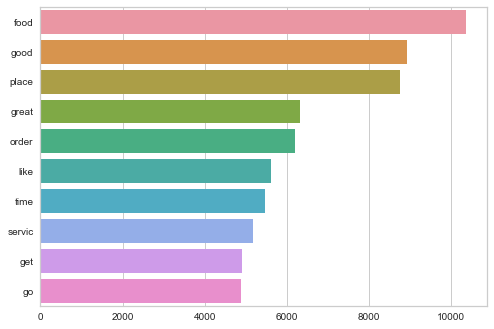

In [57]:
# Visualising the most frequent unigrams
top_unigrams = get_top_ngram(rev_df['clean'],1)[:10]
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x);

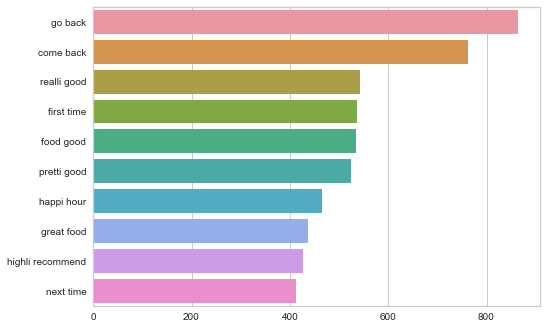

In [58]:
# Visualising the most frequent bigrams
top_bigrams = get_top_ngram(rev_df['clean'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x);

### Apply the Word2Vec model with bigrams

In [59]:
# We drop the infrequent words using a min_count (count < min_count)
model= Word2Vec(bigram_token, min_count=3, vector_size=300,workers=3, window=3)

In [60]:
words=list(model.wv.index_to_key)

In [61]:
model.wv.vectors.shape[0]

9399

In [62]:
print(model.wv.vectors.shape)

(9399, 300)


In [63]:
X=model.wv.vectors

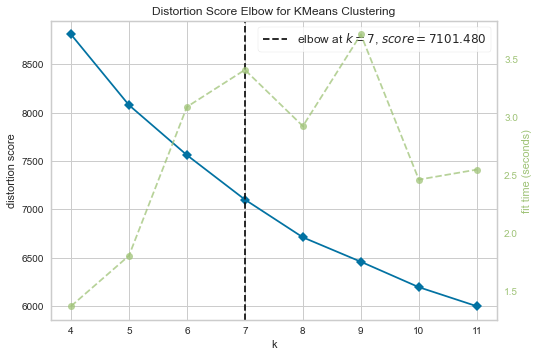

In [64]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show(); 

**So 7 is the optimal number of n_cluster.**

In [65]:
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print (silhouette_score)

0.4341276


In [67]:
kmcluster = pd.DataFrame(kmeans.labels_, columns=['cluster'])
kmcluster.head()

cluster
0        6
1        6
2        6
3        1
4        2

In [68]:
### TSNE for visualisation
tsne = manifold.TSNE(n_components=3, random_state=42, perplexity=30)
tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=tsne, columns=['tsne1', 'tsne2', 'tsne3'])

In [69]:
tsne_df=pd.concat([tsne_df, kmcluster], axis=1)
tsne_df.head()

tsne1      tsne2      tsne3  cluster
0 -10.912746 -14.194275  14.405404        6
1  -2.340147 -15.938577   6.869594        6
2   0.171938 -15.369926   9.730430        6
3 -13.415375  -8.140023  -1.880962        1
4 -14.457115 -13.559216   4.522621        2

In [70]:
px.scatter_3d(tsne_df, x='tsne1', y='tsne2', z='tsne3', color='cluster')

In [71]:
for i, word in enumerate(words):  
    print (word + ":" + str(labels[i]))

place:6
food:6
good:6
order:1
get:2
great:6
like:1
one:5
go:5
servic:6
restaur:6
time:2
tri:5
love:1
also:1
realli:6
nice:6
menu:6
got:1
delici:3
eat:5
tabl:2
drink:6
would:5
well:6
even:2
come:5
chicken:3
u:2
littl:1
make:5
back:2
alway:6
price:6
im:5
came:2
best:1
flavor:3
burger:3
pizza:1
fri:3
tast:3
went:2
meal:5
ask:2
dish:3
friend:2
look:6
amaz:1
bar:6
wait:2
want:5
ive:5
sauc:3
peopl:2
much:5
made:1
dont:5
two:2
dinner:2
salad:3
thing:5
didnt:2
fresh:3
serv:1
day:2
could:2
locat:6
server:2
take:2
experi:6
still:5
way:5
side:3
think:5
better:5
lot:6
say:5
never:2
sandwich:3
seat:2
lunch:2
first:2
staff:6
busi:2
bit:1
pretti:6
right:5
chees:3
visit:5
enjoy:6
everyth:6
small:6
top:3
know:5
definit:5
said:2
wasnt:5
need:5
meat:3
sinc:5
night:2
work:2
beer:6
around:2
area:5
tasti:3
though:6
awesom:6
star:5
coffe:6
perfect:1
atmospher:6
use:5
see:2
bad:5
enough:6
walk:2
ever:5
favorit:1
find:5
open:2
expect:6
friendli:6
review:5
disappoint:5
bread:3
excel:6
seem:6
taco:3
someth:5
che

item_menu:5
eater:1
hurri:5
english:4
weather:5
buffalo:1
took_minut:2
admit:5
send:5
forev:5
gnocchi:1
espresso:1
dip_sauc:1
warn:5
tot:1
italian_food:5
b:5
cupcak:1
jam:1
teriyaki:1
high_qualiti:1
perfectli_cook:3
god:5
took_order:2
chorizo:1
overal_great:5
rel:5
contact:2
croissant:1
scrambl:1
weekday:5
anyth_el:5
dive:5
green_bean:3
par:5
mall:5
flip:5
awkward:5
tast_fresh:1
memori:5
next_door:5
till:2
dozen:5
stori:5
went_lunch:5
deli:1
claim:5
oili:1
quantiti:6
photo:5
everi_day:5
shock:5
hipster:5
one_day:5
pain:5
grill_chees:1
v:1
luck:5
big_fan:5
spread:1
mother:5
fork:1
parent:5
comfort_food:1
winter:5
replac:5
certain:5
underwhelm:1
courteou:6
paella:1
random:5
jalapeno:1
hip:6
execut:1
slider:1
wait_hour:2
fajita:1
age:5
skewer:1
undercook:1
belli:4
respect:5
trendi:6
hardli:5
stood:5
bright:6
masala:1
biggest:1
place_pack:5
omelet:1
give_tri:5
nd:5
favourit:1
fault:5
bloodi_mari:1
closer:5
driver:5
result:5
hubbi:1
melt_mouth:1
proceed:2
feed:5
among:5
farm:1
calzon:1
excu

aka:4
male:4
mi:4
lil:4
lacklust:4
whatsoev:4
parish:4
brioch:4
unfriendli:4
chic:4
western:4
treatment:4
reput:4
array:4
nom:4
biryani:4
factori:4
creation:4
miser:4
stupid:4
shut:4
frost:4
pet:4
stair:4
risk:4
pocket:4
increas:4
gluten:4
quail:1
accent:4
housemad:1
mahi:4
tastier:4
laptop:4
enorm:4
epic:4
video:4
marinara:4
overr:4
splurg:4
jimmi:4
sunset:4
inconveni:4
hotpot:4
seattl:4
tall:4
chick:4
concoct:4
held:4
gold:4
valentin:4
arm:4
discus:4
ordinari:4
f:4
moder:4
handmad:4
avenu:4
proxim:4
croquett:1
eel:4
poison:4
hi:4
aspect:4
angel:4
brooklin:4
savor:4
oatmeal:4
trick:4
bark:4
law:4
taqueria:4
di:4
eve:4
visitor:4
hawthorn:4
sight:4
lasagna:4
declin:4
fishi:4
flaki:1
hr:4
sf:4
consider:4
broke:4
tooth:4
speedi:4
jamaican:4
outrag:4
soo:4
festiv:4
midnight:4
hh:4
superior:4
thanksgiv:4
portobello:4
bee:4
bird:4
sticker:4
torchi:4
code:4
father:4
resist:4
effect:4
function:4
grade:4
tear:4
intend:4
clientel:4
um:4
jp:4
souffl:4
papa:4
kobe:4
comparison:4
rank:4
shitti:4
su

taj:0
snatch:0
michael:0
barrestaur:0
easiest:0
clog:0
bangkok:0
fog:0
feat:0
geniu:0
kiddi:0
inn:0
pod:0
towner:0
file:0
dulc:0
lion:0
provolon:0
zone:0
piccata:0
belgium:0
sweetheart:0
nutti:0
wilt:0
duh:0
dominican:0
alter:0
verbal:0
wee:0
sensat:0
chedd:0
froyo:0
net:0
consciou:0
assumpt:0
overhyp:0
firecrack:0
flipper:0
cockroach:0
sardin:0
plethora:0
descent:0
xiao:0
vert:0
network:0
broil:0
satisfact:0
kimche:0
accomplish:0
ruben:0
dynamit:0
leak:0
omuric:0
muy:4
arteri:0
cubano:0
cough:0
cbc:0
stain:0
hawaii:0
delta:0
unbear:0
dolma:0
charro:0
solv:0
cluster:0
neutral:0
sope:0
ass:0
panna:0
cotta:0
incorpor:0
crank:0
maggiano:0
maid:0
dunwoodi:0
dinnertim:0
boylston:0
maximum:0
matador:0
satisfactori:0
frog:0
furthermor:0
denmark:0
gain:0
woo:0
bedroom:0
youngest:0
inappropri:0
imperi:0
wyndham:0
glare:0
render:0
conveyor:0
m:0
pao:0
cottag:0
hanov:0
endur:0
target:0
supris:0
elementari:0
greeter:0
dun:0
obtain:0
remak:0
retail:0
easter:0
chilean:0
chung:0
defens:0
aster:0
dona

turnoff:0
swung:0
saltiest:0
cleanser:0
devot:0
tick:0
aokay:0
kraken:0
everchang:0
bbh:0
woodland:0
khayyam:0
fifti:0
sadden:0
manta:0
matur:0
miyamoto:0
departur:0
slate:0
wahlberg:0
tobiko:0
arab:0
germani:0
marutama:0
novic:0
minimalist:0
uniform:0
wingnut:0
dicey:0
ikea:0
piedmont:0
costa:0
nanami:0
satur:0
examin:0
materi:0
bonnet:0
chariti:0
epcot:0
pillowi:0
nichola:0
sherri:0
equat:0
limoncello:0
drier:0
qualm:0
raita:0
dijon:0
stalk:0
loft:0
vision:0
benihana:0
halv:0
roxi:0
obligatori:0
howl:0
investig:0
mixmenu:0
glorifi:0
canuck:0
hamachi:0
wingstop:0
greec:0
sisterinlaw:0
domin:0
flimsi:0
continent:0
marukin:0
regul:0
role:0
hectic:0
namesak:0
reviv:0
intric:0
soondubu:0
fran:0
doddi:0
tonkatsu:0
underseason:0
abus:0
andiamo:0
deterior:0
junip:0
gloria:0
scowl:0
amazebal:0
delicaci:0
iphon:0
petti:0
kenmor:0
republican:0
hero:0
grownup:0
hardwork:0
british:0
pelon:0
mar:0
kebap:0
notabl:0
hollow:0
rockin:0
eagl:0
bruin:0
foundat:0
careless:0
skytrain:0
tritip:0
firsttim:0

photograph:0
lighten:0
sierra:0
freshtast:0
vermouth:0
logist:0
inept:0
lubi:0
hibiscu:0
inexplic:0
drape:0
manchego:0
plump:0
impli:0
clove:0
macchiato:0
gen:0
durat:0
zuni:0
mumbl:0
lexington:0
quizno:0
overhaul:0
seep:0
degrad:0
lait:0
bronson:0
coal:0
pleaser:0
simplist:0
apt:0
broadcast:0
ma:0
mcmuffin:0
lavendar:0
singular:0
ongo:0
bitti:0
glamor:0
nevada:0
cannon:0
vera:0
disinterest:0
saltimbocca:0
carolin:0
prefrozen:0
sumptuou:0
rocket:0
mondo:0
scrod:0
carter:0
chocolat:0
stinson:0
comprehens:0
worcest:0
amsterdam:0
fe:0
congratul:0
douchey:0
bout:0
cocki:0
besti:0
cutter:0
disconcert:0
wheelchair:0
matchstick:0
uppiti:0
disdain:0
pose:0
passeng:0
floppi:0
newberg:0
cookout:0
doughboy:0
perfecto:0
scour:0
rins:0
strand:0
whale:0
awn:0
primo:0
lac:0
voila:0
propos:0
hiatu:0
overstuf:0
stench:0
ankara:0
rick:0
kenni:0
buena:0
kalua:0
billiard:0
nuff:0
cereal:0
abound:0
goodwil:0
natto:0
rez:0
personnel:0
shoo:0
molli:0
speakeasi:0
tyson:0
salon:0
picadillo:0
overindulg:0
simpl

felafel:0
victoria:0
yummiest:0
eighti:0
millenia:0
frutti:0
greati:0
ration:0
tarter:0
behalf:0
americana:0
fieri:0
mozzerella:0
rescu:0
relent:0
yummm:0
vici:0
hana:0
manuela:0
sensual:0
fanfar:0
mildew:0
marathon:0
minus:0
appeas:0
bianco:0
moi:0
amd:0
idk:0
controversi:0
needl:0
terrac:0
constitut:0
cancer:0
wealth:0
stadium:0
pinpoint:0
startup:0
waaaay:0
tilikum:0
definatli:0
stix:0
jess:0
pesarattu:0
sailboat:0
overfri:0
anywayi:0
tantrum:0
ochoa:0
francesco:0
negitoro:0
pocki:0
goddess:0
adject:0
versa:0
elect:0
soooooooo:0
horseman:0
hereit:0
erin:0
oddest:0
pharr:0
wrongi:0
nova:0
veil:0
hefeweizen:0
gentrif:0
ahhhh:0
mortifi:0
dayum:0
ornament:0
pickiest:0
barrio:0
ahmaz:0
teochew:0
environment:0
throwback:0
shaw:0
yippe:0
sparerib:0
luggag:0
doubletre:0
trooper:0
mannok:0
wharf:0
kelaguen:0
mei:0
cooker:0
unwrap:0
tunnel:0
suzett:0
eastsid:0
nitro:0
quesito:0
pastelito:0
kool:0
patacon:0
truluck:0
coffeeshop:0
carlucci:0
haa:0
fussi:0
pest:0
latina:0
mixto:0
spigot:0
reisl:

In [72]:
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]
for i in range(7):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:30]:
        print(' %s' % words[ind], end='')
    print()  

cluster 0: one roll staff ever let way stop much food item happi_hour check well like work light mayb sandwich park grill entre enjoy know bowl warm see use dine qualiti happi
cluster 1: let one staff way roll ever still mayb stop park bacon check work ok much said top long happi_hour decor made item see select go grill know dish bowl leav
cluster 2: one food light small like well ever hot item sandwich call drink first_time warm local roll kid know grill disappoint impress could staff hour your half meat dine mayb way
cluster 3: let still ok way go bacon decor mayb top made staff park select stop said work seat leav see long look ever check pm one thing best appet thought much
cluster 4: one roll staff ever let food stop way happi_hour item much check light well like work mayb sandwich grill know enjoy park entre bowl warm see qualiti dine half use
cluster 5: one roll ever item food happi_hour staff like well much light qualiti sandwich grill way mayb stop check work dine enjoy warm e

**So we see in the word2vec case we have 'Cluster 6'  contains the word like  'disappoint' and 'bad'**

In [73]:
#add the words for the hover effect
tsne_df['word'] = words
tsne_df.head()

tsne1      tsne2      tsne3  cluster   word
0 -10.912746 -14.194275  14.405404        6  place
1  -2.340147 -15.938577   6.869594        6   food
2   0.171938 -15.369926   9.730430        6   good
3 -13.415375  -8.140023  -1.880962        1  order
4 -14.457115 -13.559216   4.522621        2    get